In [1]:
# Numpy for efficient Matrix and mathematical operations.
import numpy as np

# Matplotlib for visualizing graphs
import matplotlib

# import matplotlib for plotting and visualization
import matplotlib.pyplot as plt 
%matplotlib inline

![](imgs/AND_table_with_plot.png)

# Data Preparation

In [2]:
# This is our AND function data 
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])

Y = np.array([
    [0],
    [0],
    [0],
    [1]])

In [3]:
# Tranpose matrix
X_train = X.T
Y_train = Y.T

In [4]:
print("X_train dataset \n", X_train)
print("Y_train dataset \n", Y_train)

X_train dataset 
 [[0 0 1 1]
 [0 1 0 1]]
Y_train dataset 
 [[0 0 0 1]]


In [5]:
#This is the expected input matrix shape/dimension
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)

X_train shape (2, 4)
Y_train shape (1, 4)


In [6]:
X_train.shape

(2, 4)

# Neural Network Functions

In [29]:
def initialize_parameters_zeros(dim):
    n_features = dim
    n_out = 1
    params = { "W": np.zeros((n_out, n_features)),
           "b": np.zeros((n_out, 1)) }
    return params

def sigmoid(Z, derivative=False):
    if derivative:
        sig = 1 / (1 + np.exp(-Z))
        return sig*(1-sig)
    return 1 / (1 + np.exp(-Z))                            

def feed_forward(X, params):
    cache = {}
    cache["Z"] = np.dot(params["W"], X) + params["b"]
    cache["A"] = sigmoid(cache["Z"], False)
    return cache

def back_propagate(X, Y, cache):
    m = X.shape[1]
    P=cache["A"]
    #dP = (1/m) * (P-Y)/(P*(1-P))
    #dZ = dP * sigmoid(cache["Z"], derivative=True)
    ## Simplified
    dZ = (1/m) * (P-Y)    
    dW = np.dot(dZ, X.T)
    db = np.sum(dZ, axis=1, keepdims=True)
    return {"dW": dW, "db": db}

def update_parameters(params, grads, learning_rate):
    W = params["W"] - learning_rate * grads["dW"]
    b = params["b"] - learning_rate * grads["db"]
    return {"W": W, "b": b}

def BinaryCrossEntropy(Y, P):
    m = Y.shape[1]
    cost =  (1 / m) * np.sum(np.multiply(-Y, np.log(P)) 
                             - np.multiply(1 - Y, np.log(1 - P)))
    return cost


# Neural Network Model Setup

![](imgs/2in_1_layer_NN.png)

In [30]:
# Parameters initialization
params = initialize_parameters_zeros(X_train.shape[0])

In [31]:
# parameters' shape
print("W shape", params['W'].shape)
print("b shape", params['b'].shape)

W shape (1, 2)
b shape (1, 1)


In [25]:
# parameters' initialised randomly
params

{'W': array([[0., 0.]]), 'b': array([[0.]])}

# Neural Network Training

In [11]:
# Hyper-parameters
learning_rate = 1
number_of_epoch=70
m_batch = X_train.shape[1]

# For testing purposes, we fixed the W and b
params['W'] = np.array([[.1, .6]])
params['b'] = np.array([[0]])

# Initially empty list, this will store all the training cost values
costs = []

# Start training
for epoch in range(number_of_epoch):
    
    cache = feed_forward(X_train, params)
    grads = back_propagate(X_train, Y_train, cache)
    params = update_parameters(params, grads, learning_rate)

    cost = BinaryCrossEntropy(Y_train, cache["A"])
    
    if (epoch % 1) == 0 or epoch == number_of_epoch - 1:
        print("Cost at epoch#{}: {:.5f}".format(epoch, cost))
        costs.append(cost)  
    

Cost at epoch#0: 0.71955
Cost at epoch#1: 0.61831
Cost at epoch#2: 0.56856
Cost at epoch#3: 0.53903
Cost at epoch#4: 0.51762
Cost at epoch#5: 0.49991
Cost at epoch#6: 0.48420
Cost at epoch#7: 0.46982
Cost at epoch#8: 0.45646
Cost at epoch#9: 0.44395
Cost at epoch#10: 0.43220
Cost at epoch#11: 0.42112
Cost at epoch#12: 0.41068
Cost at epoch#13: 0.40080
Cost at epoch#14: 0.39144
Cost at epoch#15: 0.38257
Cost at epoch#16: 0.37414
Cost at epoch#17: 0.36612
Cost at epoch#18: 0.35849
Cost at epoch#19: 0.35121
Cost at epoch#20: 0.34425
Cost at epoch#21: 0.33761
Cost at epoch#22: 0.33124
Cost at epoch#23: 0.32515
Cost at epoch#24: 0.31930
Cost at epoch#25: 0.31368
Cost at epoch#26: 0.30828
Cost at epoch#27: 0.30309
Cost at epoch#28: 0.29809
Cost at epoch#29: 0.29327
Cost at epoch#30: 0.28862
Cost at epoch#31: 0.28413
Cost at epoch#32: 0.27979
Cost at epoch#33: 0.27560
Cost at epoch#34: 0.27154
Cost at epoch#35: 0.26761
Cost at epoch#36: 0.26381
Cost at epoch#37: 0.26011
Cost at epoch#38: 0.25

# Performance Evaluation

## Plot Learning Curve

In [12]:
def plot_learning_curve(costs, learning_rate, total_epochs, save=False):
    
    # plot the cost
    plt.figure()
    #plt.style.use("fivethirtyeight")
    plt.style.use('seaborn-whitegrid')
    
    # the steps at with costs were recorded
    steps = int(total_epochs / len(costs))  
    plt.ylabel('Cost')
    plt.xlabel('Iterations ')
    plt.title("Learning rate =" + str(learning_rate))
    plt.plot(np.squeeze(costs))
    locs, labels = plt.xticks()
    # change x labels of the plot
    plt.xticks(locs[1:-1], tuple(np.array(locs[1:-1], dtype='int')*steps))  
    plt.xticks()
    if save:
        plt.savefig('Cost_Curve.png', bbox_inches='tight')
    plt.show()

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


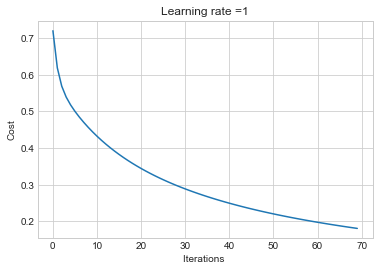

In [14]:
plot_learning_curve(costs, learning_rate, number_of_epoch, save=True)

## Calculate Model's Accuracy

In [15]:
def predict(data_in, label_in, params, threshold):
    m = data_in.shape[1]
    predict = np.zeros((1,m))
    cache = feed_forward(data_in, params)
    probs=cache["A"]
    prediction = (probs >= threshold) * 1.0
    accuracy = np.mean(prediction == label_in) * 100
    return probs, prediction, accuracy

In [16]:
classifcation_thresh = 0.5

probs, predicted_outputs, accuracy = predict(X_train, Y_train, params, classifcation_thresh)

print("The predicted outputs of 4 examples: \n{}".format(predicted_outputs[:,:4]))
print("The predicted prbabilities of 4 examples:\n {}".format(np.round(probs[:, :4], decimals=3)))
print("\nThe accuracy of the model is: {}%".format(accuracy))

The predicted outputs of 4 examples: 
[[0. 0. 0. 1.]]
The predicted prbabilities of 4 examples:
 [[0.017 0.182 0.179 0.739]]

The accuracy of the model is: 100.0%


## Plot Decision Boundary

In [17]:
def plot_decision_boundary(model, X, Y, axis_lines=False,save=False):
    # first plot the data to see what is the size of the plot
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y))  # s-> size of marker

    # get the x and y range of the plot
    x_ticks = plt.xticks()[0]
    y_ticks = plt.yticks()[0]

    plt.clf()  # clear figure after getting size

    # Generate a grid of points between min_x_point-0.5 and max_x_point+0.5 
    # with 1000 points in between, similarly, for y points
    xs = np.linspace(min(x_ticks) - 0.5, max(x_ticks) + 0.5, 1000)
    ys = np.linspace(max(y_ticks) + 0.5, min(y_ticks) - 0.5, 1000)

    xx, yy = np.meshgrid(xs, ys)  # create data points

    # Predict the function value for the whole grid
    # np.c: Translates slice objects to concatenation along the second axis.
    prediction_data = np.c_[xx.ravel(), yy.ravel()]
    
    print("XX: {}, XX.ravel: {}".format (xx.shape, xx.ravel().shape))
    print("yy: {}, yy.ravel: {}".format (yy.shape, yy.ravel().shape))
    print("np.c concated shape{} as Predidction_data".format (prediction_data.shape))
        
    print("Prediction Data: Before Transpose", prediction_data.shape)
    prediction_data = prediction_data.T
    print("Prediction Data: After Transpose", prediction_data.shape)
    
    Z = model(prediction_data)
    print("Prediction Output (Z): Before Reshape", Z.shape)
    Z = Z.reshape(xx.shape)
    print("Prediction Output (Z): After Reshape", Z.shape)

    # Plot the contour and training examples
    plt.style.use('seaborn-whitegrid')
    # draw a blue colored decision boundary
    plt.contour(xx, yy, Z, cmap='Blues')  
    plt.title('Decision Boundary', size=18)
    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    if axis_lines:
        plt.axhline(0, color='black')
        plt.axvline(0, color='black')

    # color map 'cmap' maps 0 labeled data points to red and 1 labeled points to green
    cmap = matplotlib.colors.ListedColormap(["red", "green"], name='from_list', N=None)
    # s-> size of marker
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y), marker='x', cmap=cmap)  

    if save:
        plt.savefig('decision_boundary.png', bbox_inches='tight')
    plt.show()

XX: (1000, 1000), XX.ravel: (1000000,)
yy: (1000, 1000), yy.ravel: (1000000,)
np.c concated shape(1000000, 2) as Predidction_data
Prediction Data: Before Transpose (1000000, 2)
Prediction Data: After Transpose (2, 1000000)
Prediction Output (Z): Before Reshape (1, 1000000)
Prediction Output (Z): After Reshape (1000, 1000)


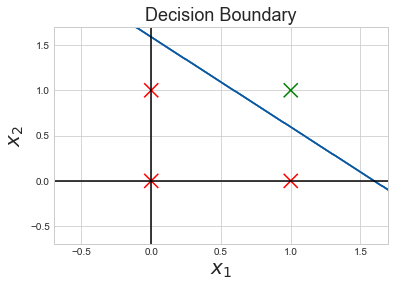

In [18]:
def predict_dec(params, data_in, threshold):
    cache = feed_forward(data_in, params)
    probas = cache["A"]
    # if probability of example >= thresh => output 1, vice versa
    predictions = (probas >= threshold) * 1.0
    return predictions

plot_decision_boundary(lambda x: predict_dec(params, x, classifcation_thresh),
                       X_train.T, Y_train, axis_lines=True, save=True)

## Plot Decision Boundary with Shaded Areas

In [19]:
def plot_decision_boundary_shaded(model, X, Y, axis_lines=False,save=False):
    # first plot the data to see what is the size of the plot
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y))  # s-> size of marker

    # get the x and y range of the plot
    x_ticks = plt.xticks()[0]
    y_ticks = plt.yticks()[0]

    plt.clf()  # clear figure after getting size

    # Generate a grid of points between min_x_point-0.5 and max_x_point+0.5 
    # with 1000 points in between, similarly, for y points
    xs = np.linspace(min(x_ticks)-0.5, max(x_ticks)+0.5, 1000)
    ys = np.linspace(max(y_ticks)+0.5, min(y_ticks)-0.5, 1000)
    xx, yy = np.meshgrid(xs, ys)

    # Predict the function value for the whole grid
    prediction_data = np.c_[xx.ravel(), yy.ravel()]

    Z = model(prediction_data)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    cmap = matplotlib.colors.ListedColormap(["red","green"], name='from_list', N=None)
    plt.style.use('seaborn-whitegrid')

    # 'contourf'-> filled contours (red('#EABDBD'): 0 / green('#C8EDD6'): 1)
    plt.contourf(xx, yy, Z, cmap=matplotlib.colors.ListedColormap(['#EABDBD', '#C8EDD6'], 
                                                                  name='from_list', N=None))
    plt.title('Shaded Decision Boundary', size=18)
    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    if axis_lines:
        plt.axhline(0, color='black')
        plt.axvline(0, color='black')
    # s-> size of marker
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y), marker='x', cmap=cmap)  

    if save:
        plt.savefig('decision_boundary_shaded.png', bbox_inches='tight')
    plt.show()

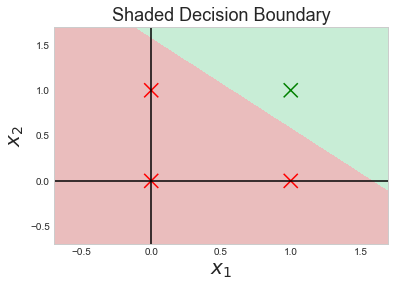

In [20]:
plot_decision_boundary_shaded(lambda x: predict_dec(params, x.T, classifcation_thresh),
                       X_train.T, Y_train, axis_lines=True, save=True)